***************

## [Final_project] 서울시 구별 습윤지수 정보

***************

### > 데이터 살펴보기




### 🌧️ 필요한 패키지 설치 및 불러오기

In [54]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import xml.etree.ElementTree as ET
import csv
import os
import numpy as np

## 에러문구 없애기
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:.8f}'.format

## 한글깨짐 방지
plt.rc('font', family='NanumBarunGothic')

In [2]:
'''
# 한글 폰트 설치 런타임 재시작 이후 셀 실행
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
'''

'\n# 한글 폰트 설치 런타임 재시작 이후 셀 실행\n!sudo apt-get install -y fonts-nanum\n!sudo fc-cache -fv\n!rm ~/.cache/matplotlib -rf\n'

### 🌧️ 데이터 불러오기

In [3]:
# 현재 작업 디렉토리
!pwd

/content


In [4]:
# 구글 드라이브 마운트

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# 원하는 위치로 경로 바꾸기
# 본인이 만든 폴더 위치를 사용
%cd /content/drive/MyDrive/final_project

/content/drive/MyDrive/final_project


### XML 데이터 파싱

In [50]:
'''
# Google Drive 경로로 변경
os.chdir('/content/drive/MyDrive/final_project')

# XML 파일을 로드합니다
tree = ET.parse('중랑구_습윤지수.xml')
root = tree.getroot()

# 히스토그램 데이터를 추출합니다
histogram_data = []

for hist_item in root.findall(".//HistItem"):
    TWI_min = hist_item.find('HistMin').text
    TWI_max = hist_item.find('HistMax').text
    TWI_count = hist_item.find('BucketCount').text
    TWI_counts = hist_item.find('HistCounts').text
    histogram_data.append([TWI_min, TWI_max, TWI_count,TWI_counts])

# CSV 파일 경로를 정의합니다
csv_file_path = '중랑구_습윤지수.csv'

# 추출한 데이터를 CSV 파일로 작성합니다
with open(csv_file_path, mode='w', newline='') as file:
    writer = csv.writer(file)
    # 헤더를 작성합니다
    writer.writerow(["TWI_min", "TWI_max", "TWI_count", "TWI_counts"])
    # 히스토그램 데이터를 작성합니다
    writer.writerows(histogram_data)

# CSV 파일 경로를 반환합니다
csv_file_path
'''

'중랑구_습윤지수.csv'

In [51]:
# CSV 파일 읽기
dat = pd.read_csv("강남구_습윤지수.csv", encoding='cp949')
dat

## 첫번째 행은 제거하여 전체 데이터 병합할 것

,TWI_min,TWI_max,TWI_count,TWI_counts
0,0.00000000,-1.00000000,1,0
1,0.95685917,22.99077034,256,10|21|67|148|218|374|576|934|1193|1619|1997|25...


In [52]:
# 서울시 25개 구별 코드와 파일 경로를 설정합니다.
files_and_codes = {
    '강남구': '강남구_습윤지수.csv',
    '강동구': '강동구_습윤지수.csv',
    '강북구': '강북구_습윤지수.csv',
    '강서구': '강서구_습윤지수.csv',
    '관악구': '관악구_습윤지수.csv',
    '광진구': '광진구_습윤지수.csv',
    '구로구': '구로구_습윤지수.csv',
    '금천구': '금천구_습윤지수.csv',
    '노원구': '노원구_습윤지수.csv',
    '도봉구': '도봉구_습윤지수.csv',
    '동대문구': '동대문구_습윤지수.csv',
    '동작구': '동작구_습윤지수.csv',
    '마포구': '마포구_습윤지수.csv',
    '서대문구': '서대문구_습윤지수.csv',
    '서초구': '서초구_습윤지수.csv',
    '성동구': '성동구_습윤지수.csv',
    '성북구': '성북구_습윤지수.csv',
    '송파구': '송파구_습윤지수.csv',
    '양천구': '양천구_습윤지수.csv',
    '영등포구': '영등포구_습윤지수.csv',
    '용산구': '용산구_습윤지수.csv',
    '은평구': '은평구_습윤지수.csv',
    '종로구': '종로구_습윤지수.csv',
    '중구': '중구_습윤지수.csv',
    '중랑구': '중랑구_습윤지수.csv'
}

# 병합할 데이터프레임 리스트를 초기화합니다.
dataframes = []

# 각 파일을 읽어서 데이터프레임으로 변환하고 구별 코드를 추가합니다.
for gu, file_path in files_and_codes.items():
    # 파일을 읽어옵니다.
    if os.path.exists(file_path):  # 파일이 존재하는지 확인
        df = pd.read_csv(file_path, encoding='cp949')

        # 첫 행이 컬럼명이 아니므로 첫 행을 제거합니다.
        df = df[1:]

        # 구별 코드를 컬럼으로 추가합니다.
        df['구별코드'] = gu

        # 데이터프레임 리스트에 추가합니다.
        dataframes.append(df)
    else:
        print(f"{file_path} 파일이 존재하지 않습니다.")

# 모든 데이터프레임을 병합합니다.
merged_data = pd.concat(dataframes, ignore_index=True)

# 컬럼 순서를 재정렬합니다 (옵션)
merged_data = merged_data[['구별코드', 'TWI_min', 'TWI_max', 'TWI_count', 'TWI_counts']]

# 병합된 데이터를 CSV 파일로 저장합니다.
merged_data.to_csv('서울시_습윤지수_병합.csv', index=False, encoding='cp949')


,구별코드,TWI_min,TWI_max,TWI_count,TWI_counts
0,강남구,0.95685917,22.99077034,256,10|21|67|148|218|374|576|934|1193|1619|1997|25...
1,강동구,0.79550815,26.14568710,256,1|3|4|13|28|75|140|226|405|613|879|1221|1653|1...
2,강북구,0.44259080,22.73329163,256,1|3|19|66|119|252|465|743|1279|1843|2439|3192|...
3,강서구,0.58882535,26.61487770,256,5|3|30|41|78|191|372|644|934|1214|1483|1816|20...
4,관악구,0.45190254,23.11600876,256,3|9|41|107|178|362|626|1084|1671|2653|3515|439...


In [53]:
# CSV 파일 읽기
dat = pd.read_csv("서울시_습윤지수_병합.csv", encoding='cp949')
dat

,구별코드,TWI_min,TWI_max,TWI_count,TWI_counts
0,강남구,0.95685917,22.99077034,256,10|21|67|148|218|374|576|934|1193|1619|1997|25...
1,강동구,0.79550815,26.14568710,256,1|3|4|13|28|75|140|226|405|613|879|1221|1653|1...
2,강북구,0.44259080,22.73329163,256,1|3|19|66|119|252|465|743|1279|1843|2439|3192|...
3,강서구,0.58882535,26.61487770,256,5|3|30|41|78|191|372|644|934|1214|1483|1816|20...
4,관악구,0.45190254,23.11600876,256,3|9|41|107|178|362|626|1084|1671|2653|3515|439...
5,광진구,0.63139170,20.50756836,256,4|9|9|34|49|89|155|302|381|514|587|744|898|949...
6,구로구,0.93922138,22.69190407,256,6|7|28|48|109|158|319|517|737|948|1363|1734|19...
7,금천구,0.60582787,24.52522469,256,5|5|10|20|43|70|163|364|511|755|986|1386|1679|...
8,노원구,0.61556530,25.45855141,256,5|16|23|85|171|324|591|994|1542|2257|2912|3590...
9,도봉구,0.48390314,24.16609573,256,6|14|34|56|95|144|180|296|433|587|755|1134|133...


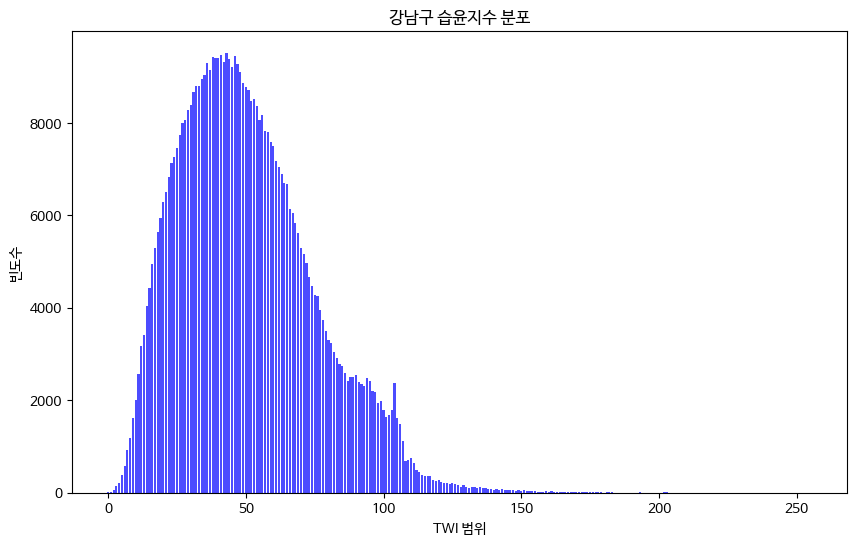

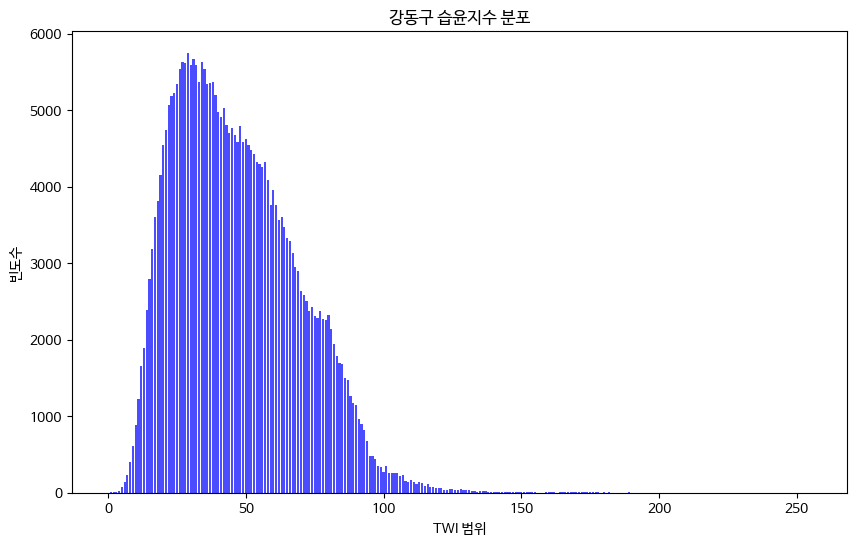

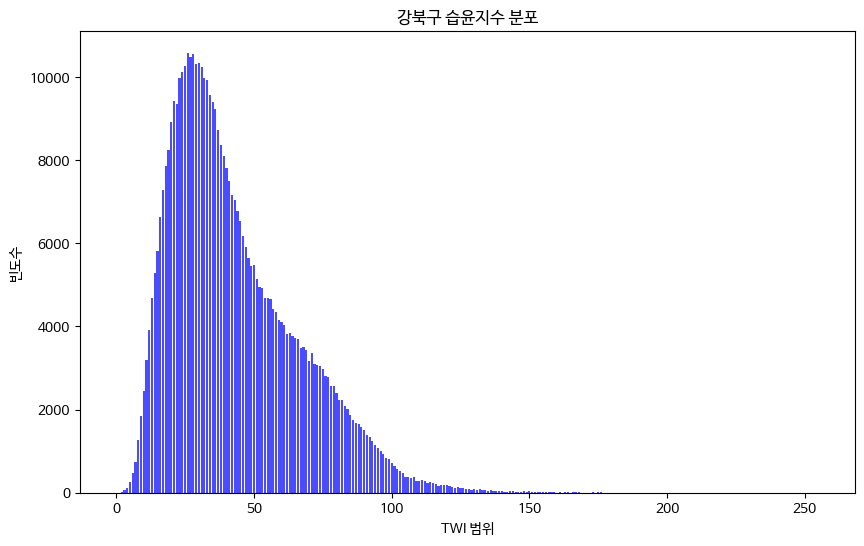

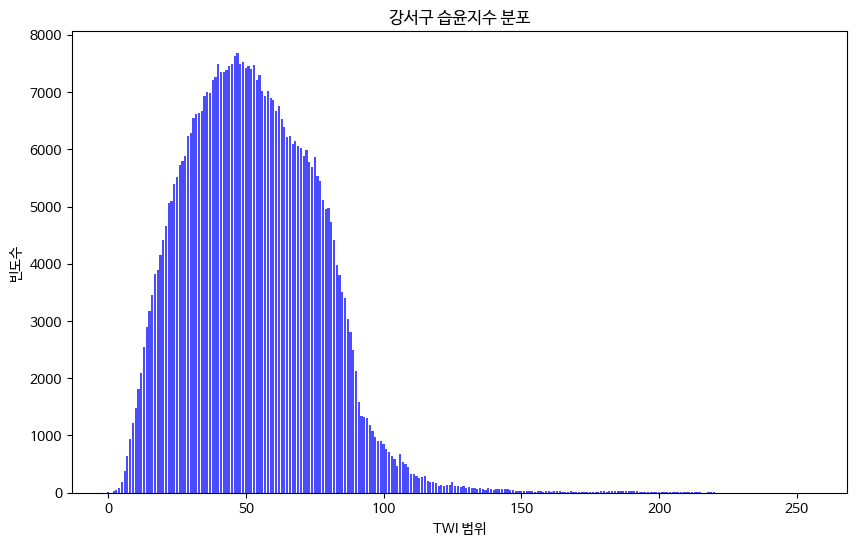

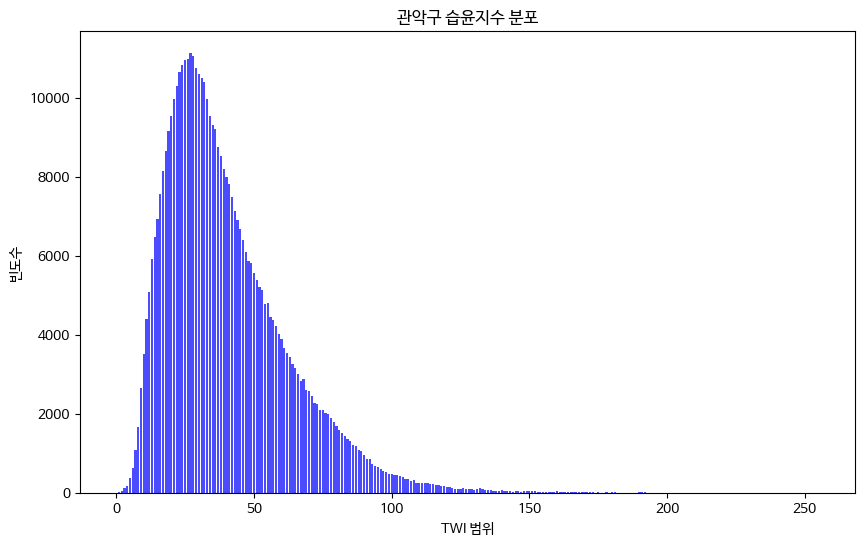

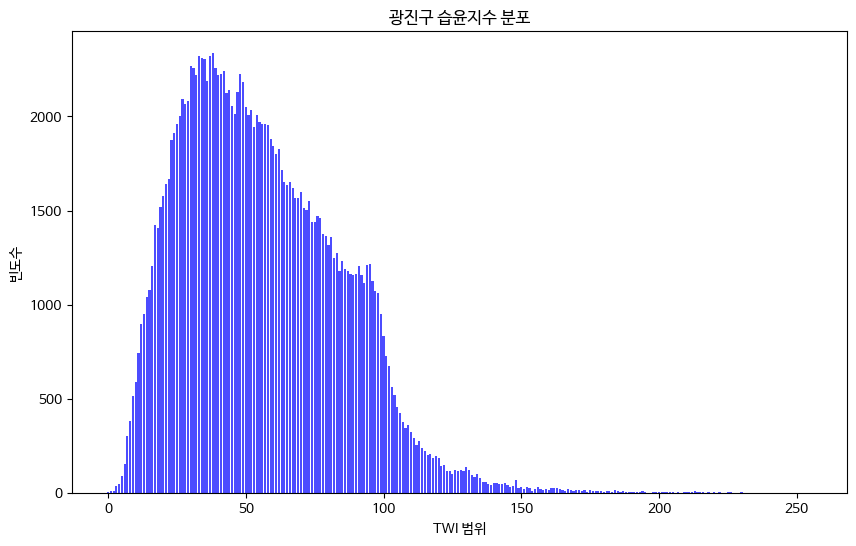

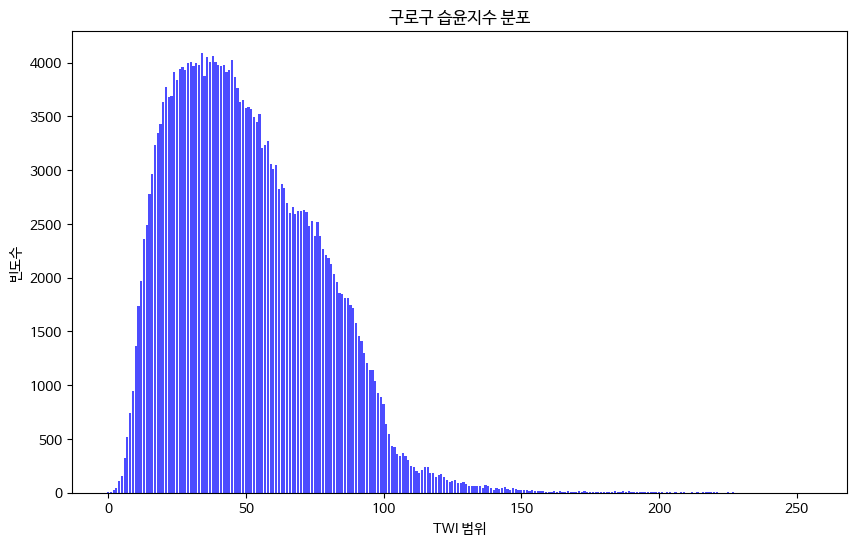

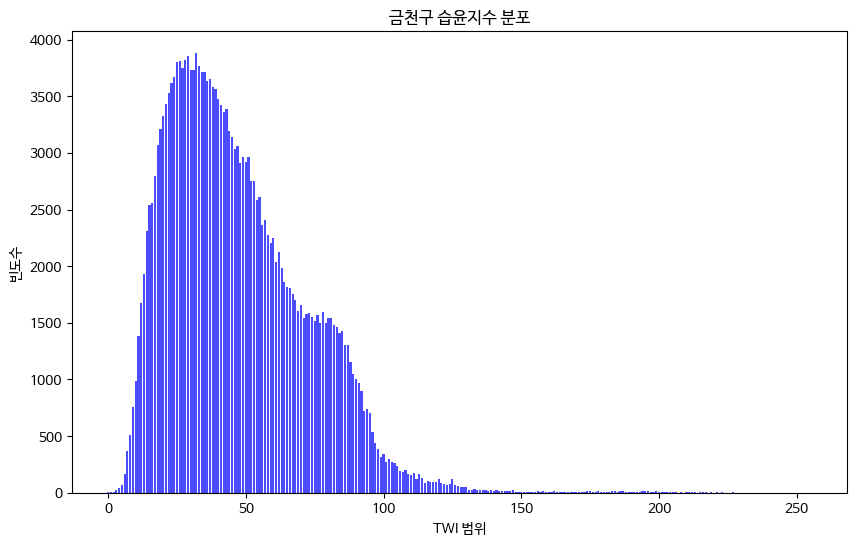

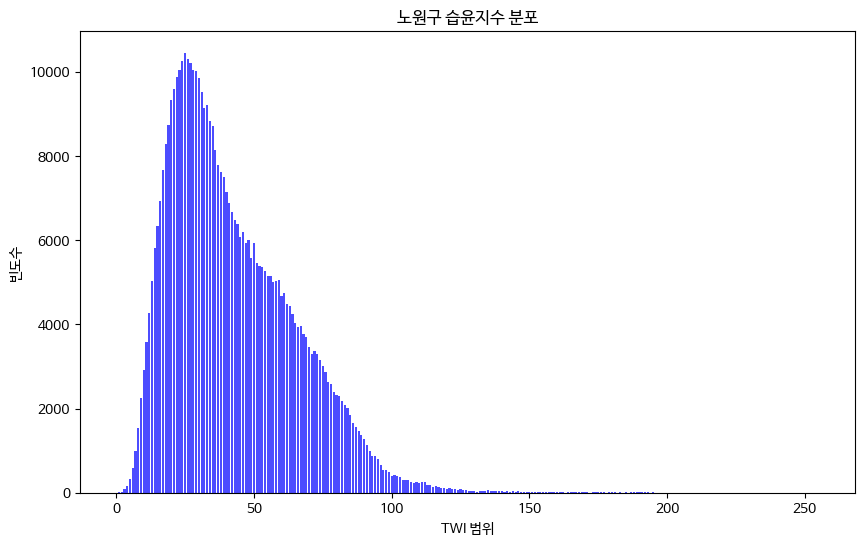

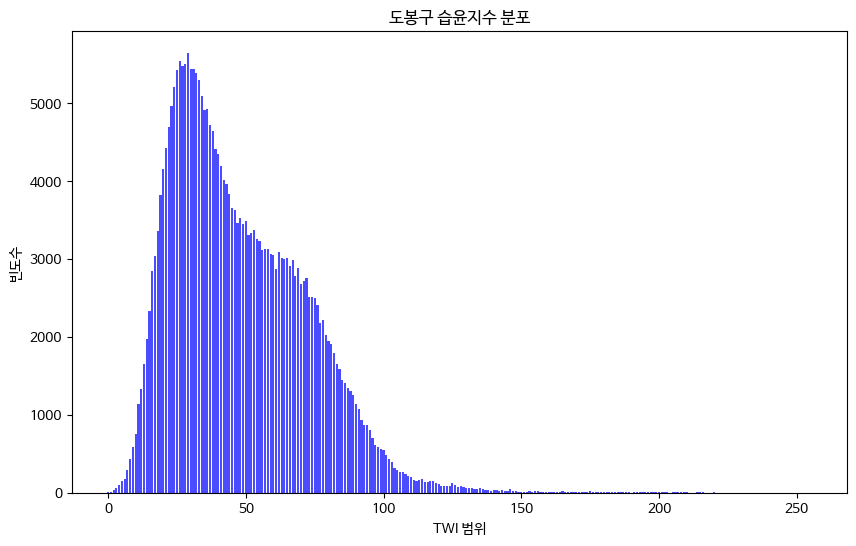

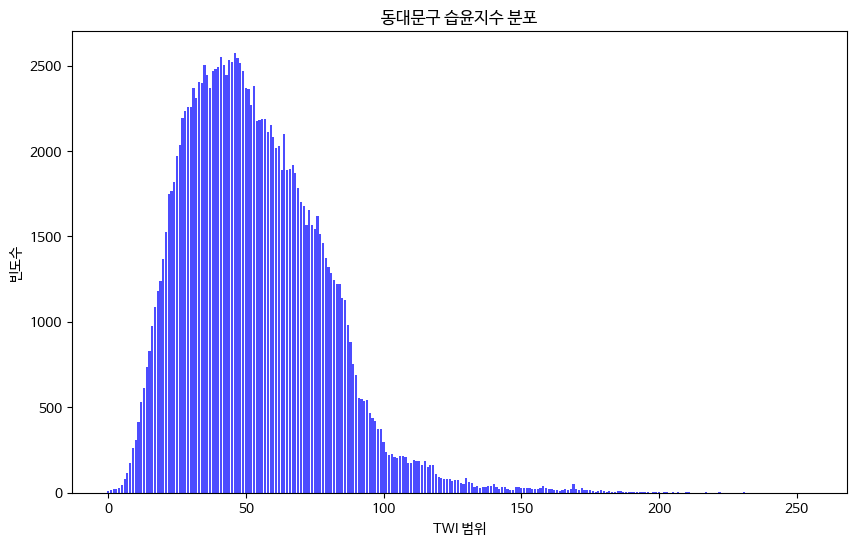

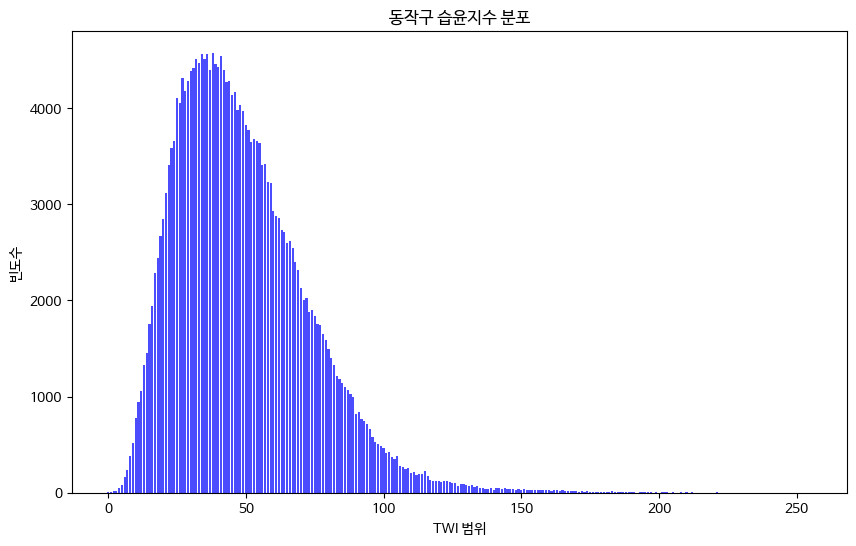

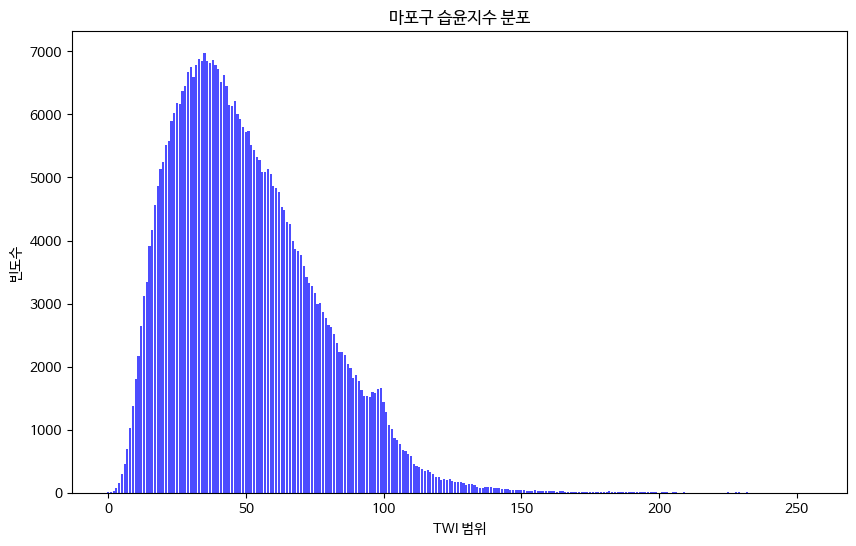

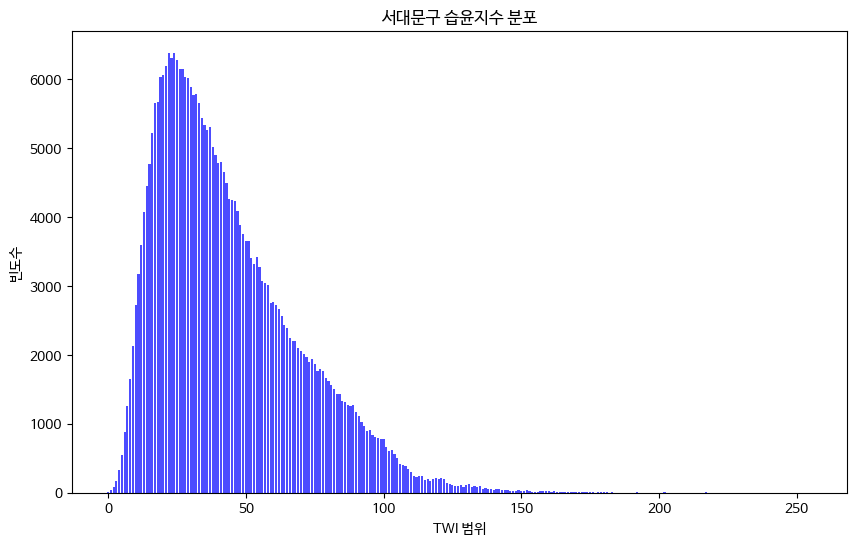

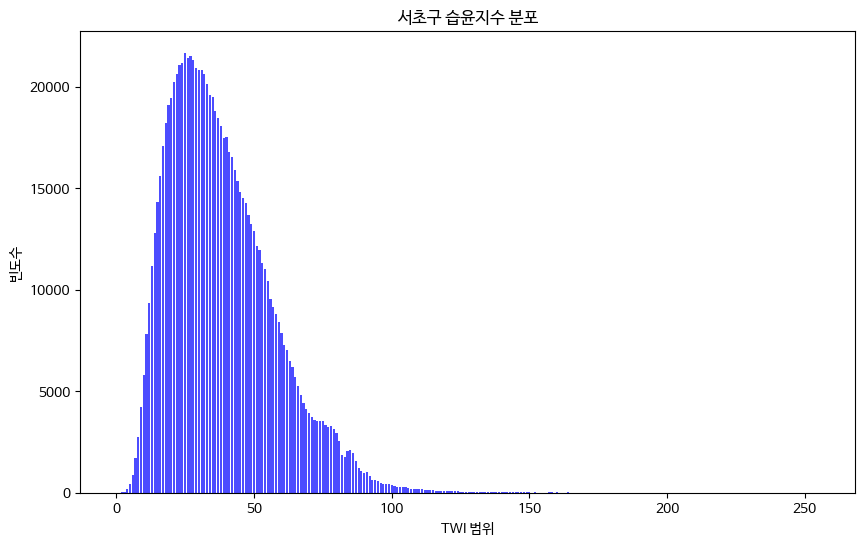

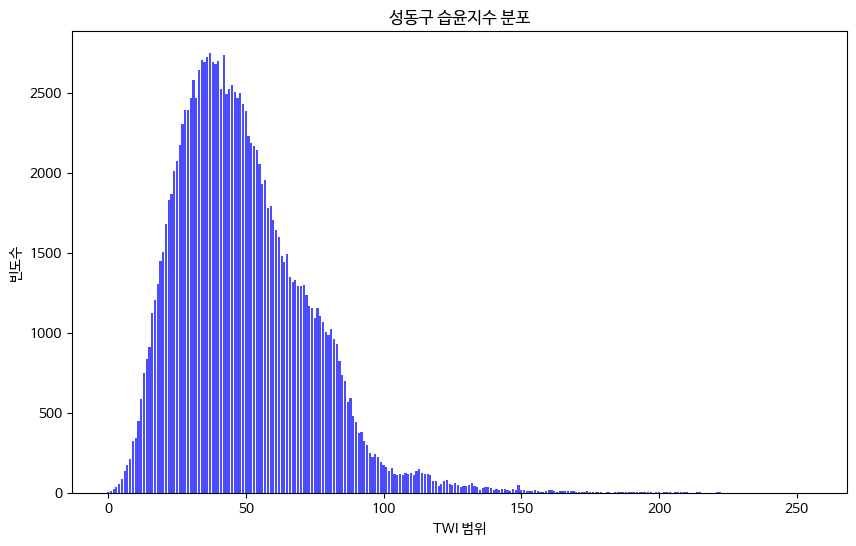

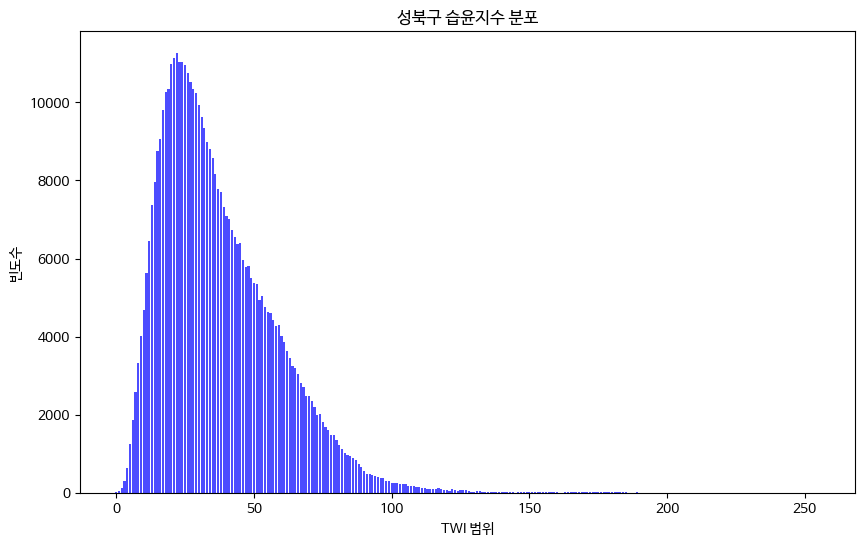

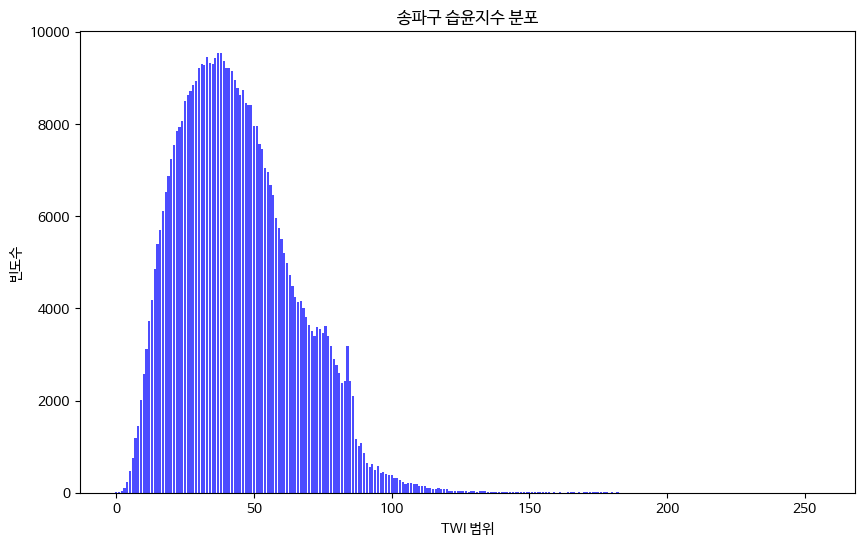

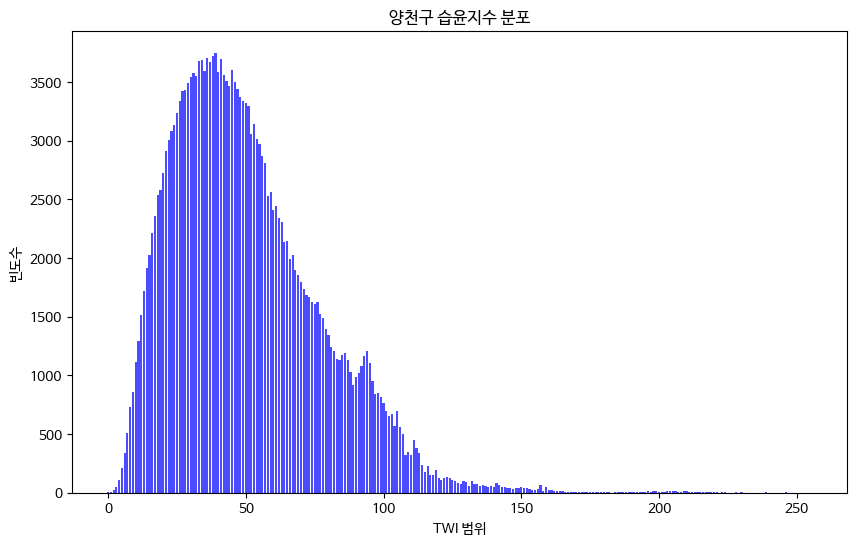

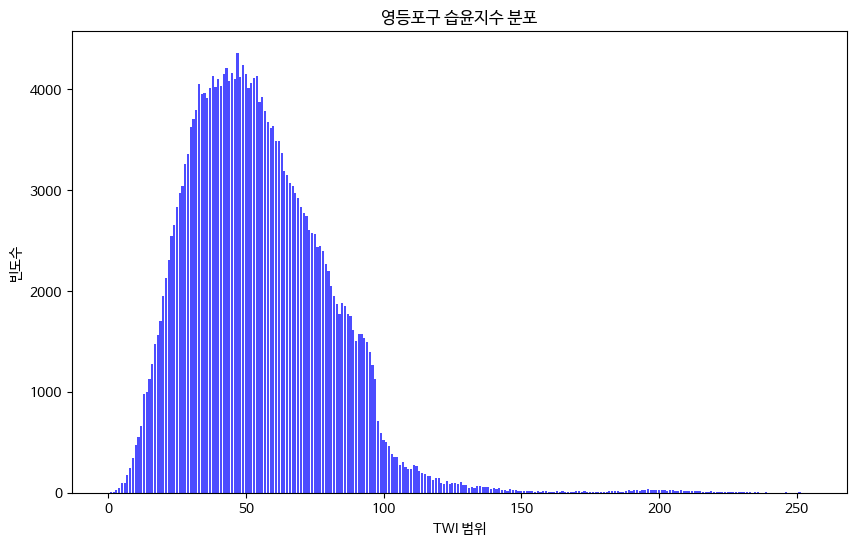

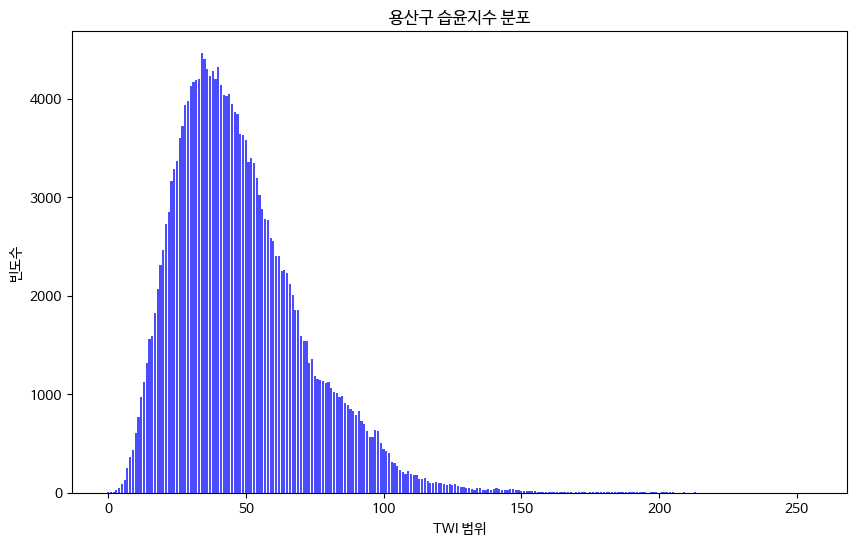

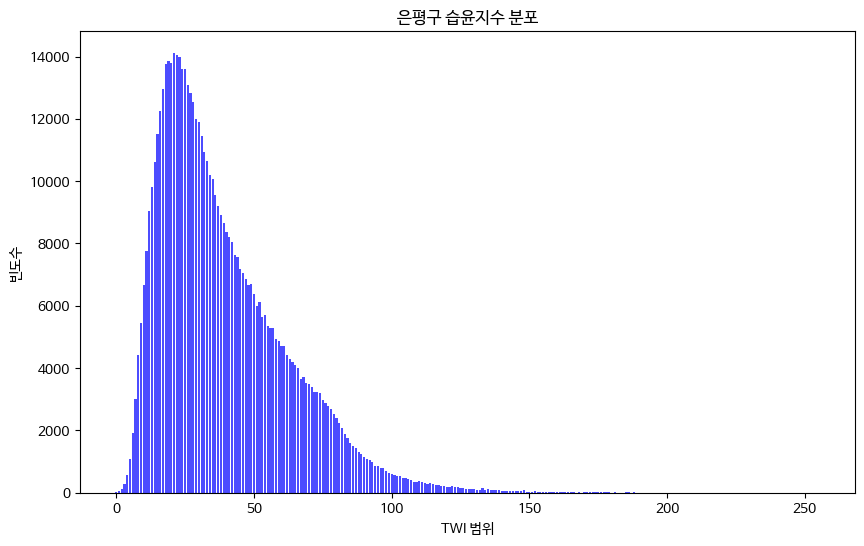

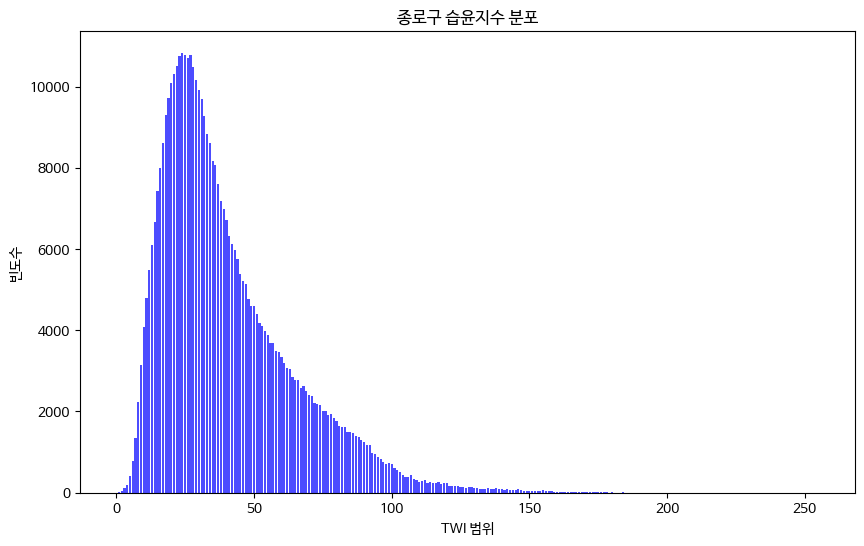

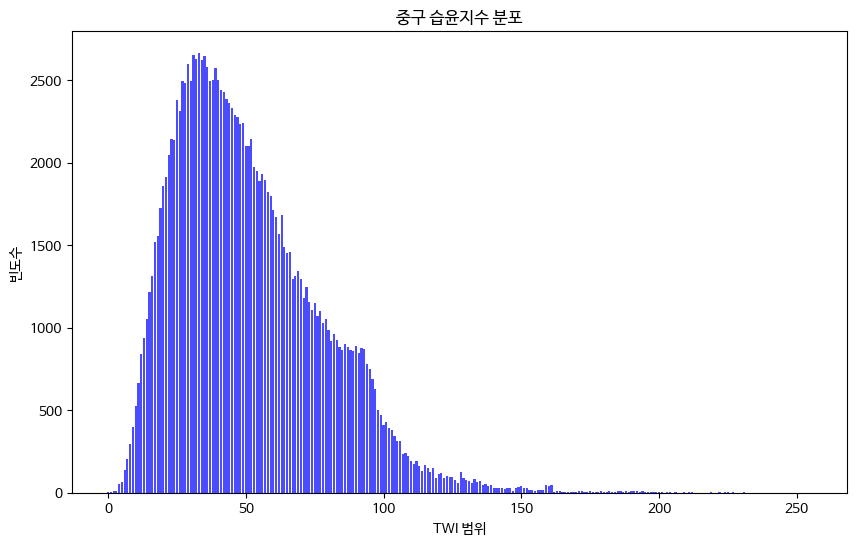

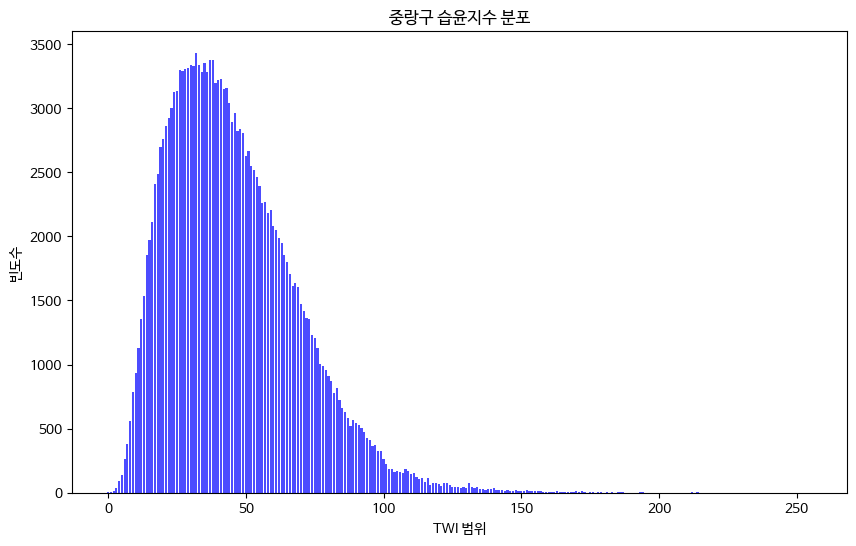

In [55]:
# TWI_counts를 분리하여 리스트로 변환하는 함수
def parse_twi_counts(twi_counts_str):
    return list(map(int, twi_counts_str.split('|')))

# 각 구별로 히스토그램을 그리는 함수
def plot_twi_distribution(df, gu):
    twi_counts_str = df[df['구별코드'] == gu]['TWI_counts'].values[0]
    twi_counts = parse_twi_counts(twi_counts_str)

    # 히스토그램 그리기
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(twi_counts)), twi_counts, color='blue', alpha=0.7)
    plt.title(f'{gu} 습윤지수 분포')
    plt.xlabel('TWI 범위')
    plt.ylabel('빈도수')
    plt.show()

# 모든 구별로 히스토그램을 그립니다.
for gu in dat['구별코드'].unique():
    plot_twi_distribution(dat, gu)


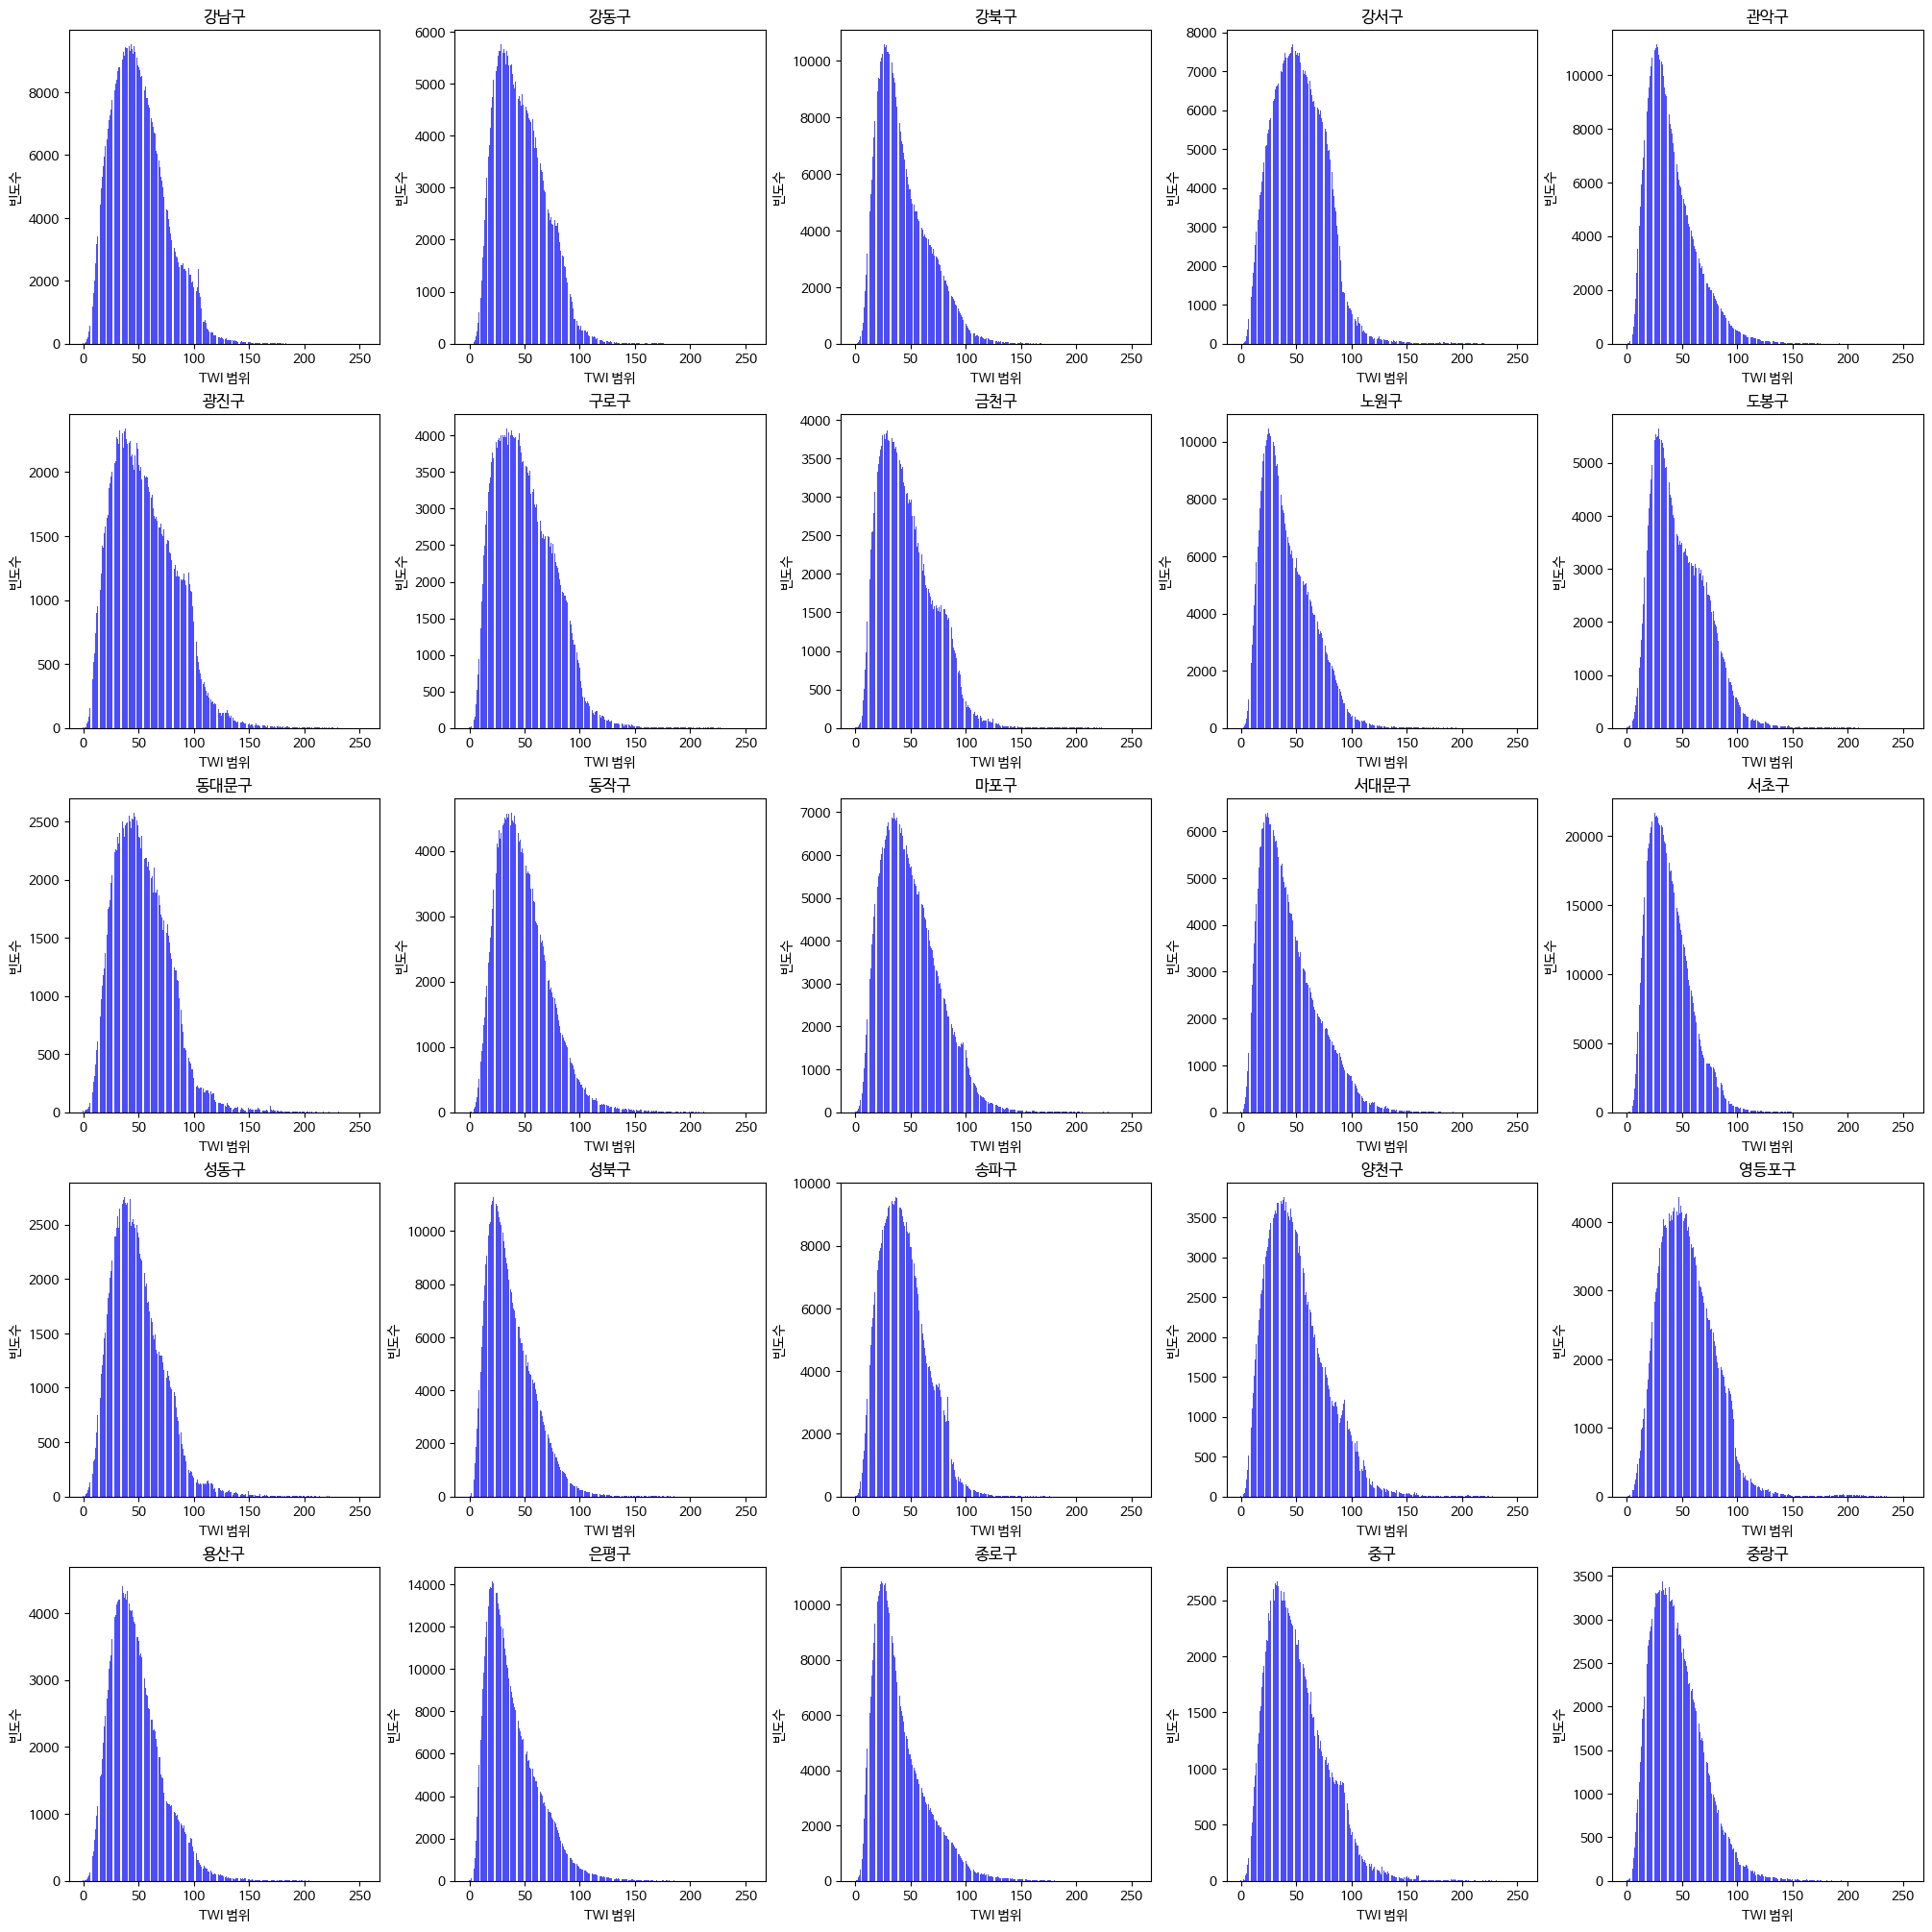

In [56]:
# TWI_counts를 분리하여 리스트로 변환하는 함수
def parse_twi_counts(twi_counts_str):
    return list(map(int, twi_counts_str.split('|')))

# 구별 코드 리스트
gu_list = dat['구별코드'].unique()

# 서브플롯의 행과 열 개수를 결정합니다.
n_gu = len(gu_list)
n_cols = 5
n_rows = (n_gu + n_cols - 1) // n_cols

# 서브플롯 설정
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 20), constrained_layout=True)

# 모든 구별로 히스토그램을 그립니다.
for i, gu in enumerate(gu_list):
    row = i // n_cols
    col = i % n_cols
    ax = axes[row, col]

    twi_counts_str = dat[dat['구별코드'] == gu]['TWI_counts'].values[0]
    twi_counts = parse_twi_counts(twi_counts_str)

    ax.bar(range(len(twi_counts)), twi_counts, color='blue', alpha=0.7)
    ax.set_title(f'{gu}')
    ax.set_xlabel('TWI 범위')
    ax.set_ylabel('빈도수')

# 남은 빈 서브플롯을 제거합니다.
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes[j // n_cols, j % n_cols])

plt.show()